In [65]:
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os
from matplotlib import pyplot as plt
import seaborn as sns

In [54]:
load_dotenv()

USER = os.getenv("DB_USER")
PASSWORD = os.getenv("DB_PASSWORD")
HOST = os.getenv("DB_HOST")
DATABASE = os.getenv("DB_RAW")

engine = create_engine(f"mysql+pymysql://{USER}:{PASSWORD}@{HOST}/{DATABASE}")

query = "SELECT * FROM accidents"
df = pd.read_sql(query, engine)

df.head(10)

,id,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,1,2023-07-29 13:00:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,...,NO INDICATION OF INJURY,0,0,0,0,0,3,13,7,7
1,2,2023-08-13 00:11:00,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,NO INDICATION OF INJURY,0,0,0,0,0,2,0,1,8
2,3,2021-12-09 10:30:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,NO INDICATION OF INJURY,0,0,0,0,0,3,10,5,12
3,4,2023-08-09 19:55:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,NONINCAPACITATING INJURY,5,0,0,5,0,0,19,4,8
4,5,2023-08-19 14:55:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,...,NO INDICATION OF INJURY,0,0,0,0,0,3,14,7,8
5,6,2023-09-06 00:59:00,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,NOT DIVIDED,STRAIGHT AND LEVEL,WET,UNKNOWN,...,NONINCAPACITATING INJURY,2,0,0,2,0,0,0,4,9
6,7,2022-12-20 11:45:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR TO FRONT,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,NO INDICATION OF INJURY,0,0,0,0,0,2,11,3,12
7,8,2023-09-20 14:38:00,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,DIVIDED - W/MEDIAN (NOT RAISED),"CURVE, LEVEL",DRY,NO DEFECTS,...,NONINCAPACITATING INJURY,1,0,0,1,0,1,14,4,9
8,9,2018-06-04 18:42:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,NO INDICATION OF INJURY,0,0,0,0,0,3,18,2,6
9,10,2023-09-07 17:30:00,STOP SIGN/FLASHER,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,NO INDICATION OF INJURY,0,0,0,0,0,4,17,5,9


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   id                             209306 non-null  int64         
 1   crash_date                     209306 non-null  datetime64[ns]
 2   traffic_control_device         209306 non-null  object        
 3   weather_condition              209306 non-null  object        
 4   lighting_condition             209306 non-null  object        
 5   first_crash_type               209306 non-null  object        
 6   trafficway_type                209306 non-null  object        
 7   alignment                      209306 non-null  object        
 8   roadway_surface_cond           209306 non-null  object        
 9   road_defect                    209306 non-null  object        
 10  crash_type                     209306 non-null  object        
 11  

In [56]:
df.dtypes

id                                        int64
crash_date                       datetime64[ns]
traffic_control_device                   object
weather_condition                        object
lighting_condition                       object
first_crash_type                         object
trafficway_type                          object
alignment                                object
roadway_surface_cond                     object
road_defect                              object
crash_type                               object
intersection_related_i                   object
damage                                   object
prim_contributory_cause                  object
num_units                                 int64
most_severe_injury                       object
injuries_total                            int64
injuries_fatal                            int64
injuries_incapacitating                   int64
injuries_non_incapacitating               int64
injuries_reported_not_evident           

In [57]:
df.size

5232650

In [58]:
df['crash_date'] = pd.to_datetime(df['crash_date'], errors='coerce')

fecha_min = df['crash_date'].min()
fecha_max = df['crash_date'].max()

print(f"primera fecha registrada: {fecha_min}")
print(f"ultima fecha registrada: {fecha_max}")


primera fecha registrada: 2013-03-03 16:48:00
ultima fecha registrada: 2025-01-18 00:17:00


In [59]:
df.describe()


,id,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
count,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000
mean,104653.500000,2.063300,0.382717,0.001859,0.038102,0.221241,0.121516,2.244002,13.373047,4.144024,6.771822
std,60421.582059,0.396012,0.799720,0.047502,0.233964,0.614960,0.450865,1.241175,5.603830,1.966864,3.427593
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,52327.250000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,9.000000,2.000000,4.000000
50%,104653.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,14.000000,4.000000,7.000000
75%,156979.750000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,17.000000,6.000000,10.000000
max,209306.000000,11.000000,21.000000,3.000000,7.000000,21.000000,15.000000,49.000000,23.000000,7.000000,12.000000


In [60]:
df.isnull().sum()

id                               0
crash_date                       0
traffic_control_device           0
weather_condition                0
lighting_condition               0
first_crash_type                 0
trafficway_type                  0
alignment                        0
roadway_surface_cond             0
road_defect                      0
crash_type                       0
intersection_related_i           0
damage                           0
prim_contributory_cause          0
num_units                        0
most_severe_injury               0
injuries_total                   0
injuries_fatal                   0
injuries_incapacitating          0
injuries_non_incapacitating      0
injuries_reported_not_evident    0
injuries_no_indication           0
crash_hour                       0
crash_day_of_week                0
crash_month                      0
dtype: int64

In [61]:
df.duplicated().sum()

0

In [62]:

for col in df.select_dtypes(include=["object","number"]).columns:
    print(f"{col}: {df[col].nunique()} valores únicos")
    print(df[col].value_counts(), "\n")


id: 209306 valores únicos
1         1
139542    1
139532    1
139533    1
139534    1
         ..
69772     1
69773     1
69774     1
69775     1
209306    1
Name: id, Length: 209306, dtype: int64 

traffic_control_device: 19 valores únicos
TRAFFIC SIGNAL              123944
STOP SIGN/FLASHER            49139
NO CONTROLS                  29508
UNKNOWN                       4455
OTHER                          670
YIELD                          468
PEDESTRIAN CROSSING SIGN       247
OTHER REG. SIGN                181
LANE USE MARKING               153
FLASHING CONTROL SIGNAL        150
POLICE/FLAGMAN                 104
OTHER WARNING SIGN              95
RAILROAD CROSSING GATE          78
SCHOOL ZONE                     33
OTHER RAILROAD CROSSING         23
RR CROSSING SIGN                18
DELINEATORS                     17
NO PASSING                      12
BICYCLE CROSSING SIGN           11
Name: traffic_control_device, dtype: int64 

weather_condition: 12 valores únicos
CLEAR       

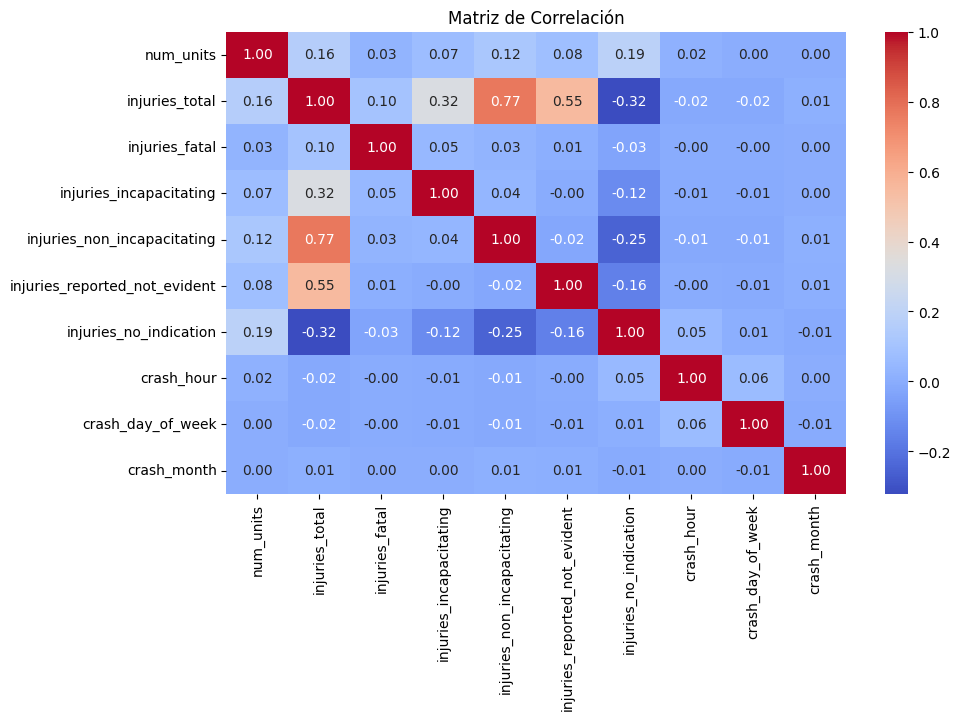

In [63]:
df_numeric = df.select_dtypes(include=["number"]).drop(columns=["id"], errors="ignore")

plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()





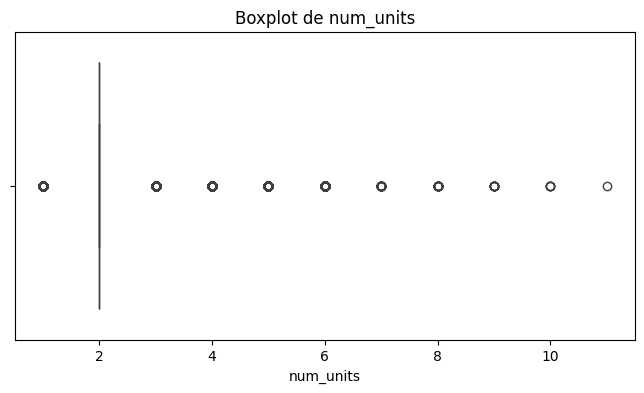

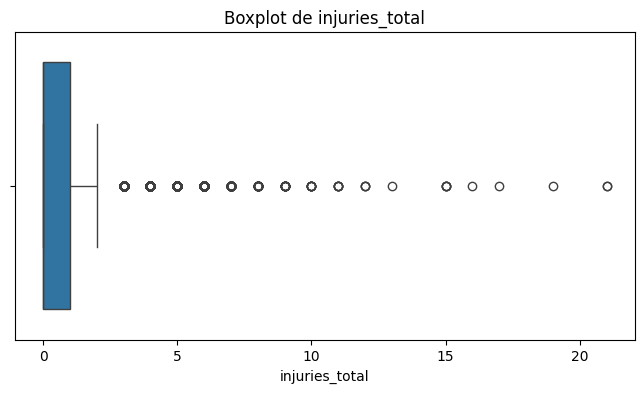

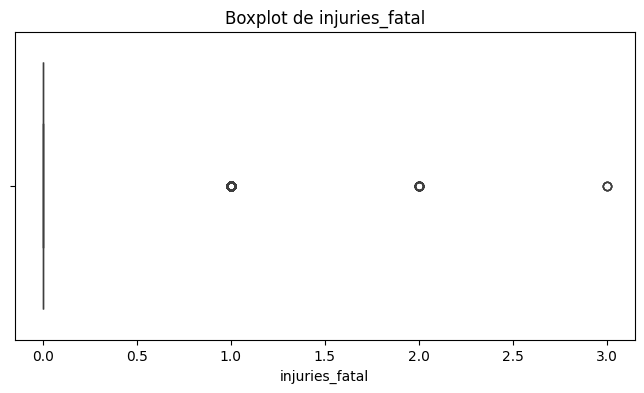

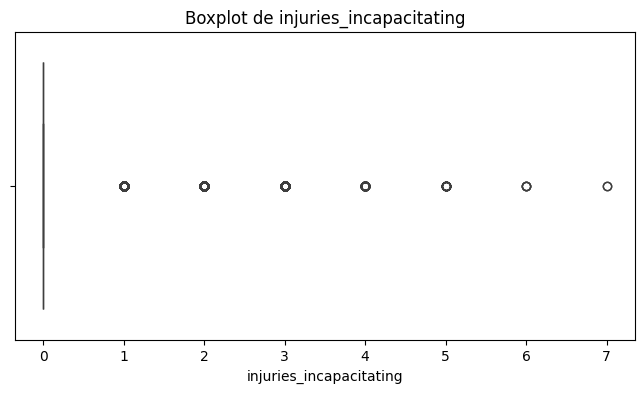

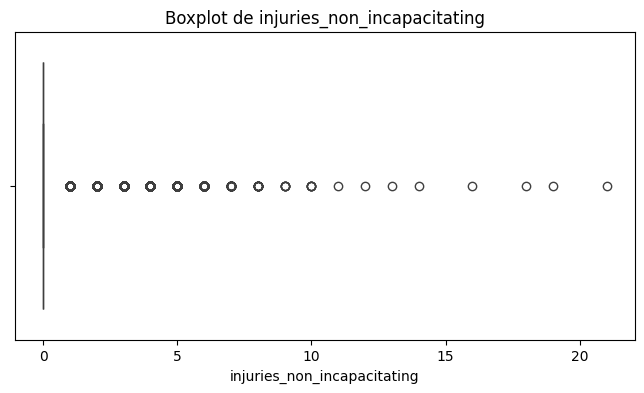

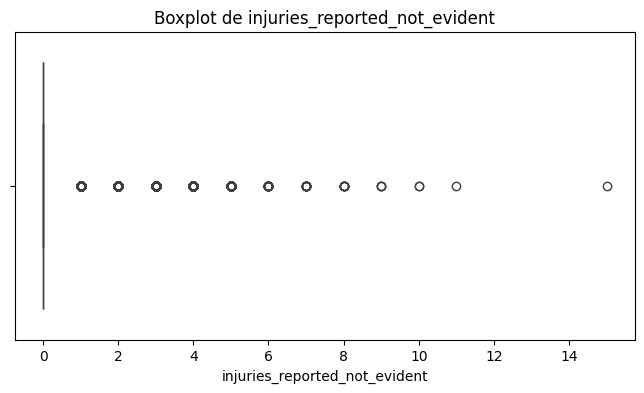

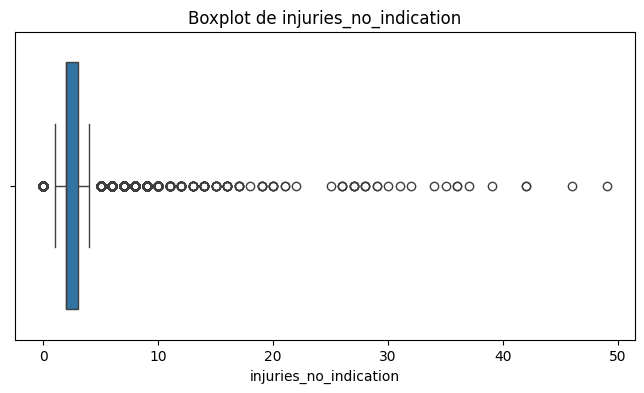

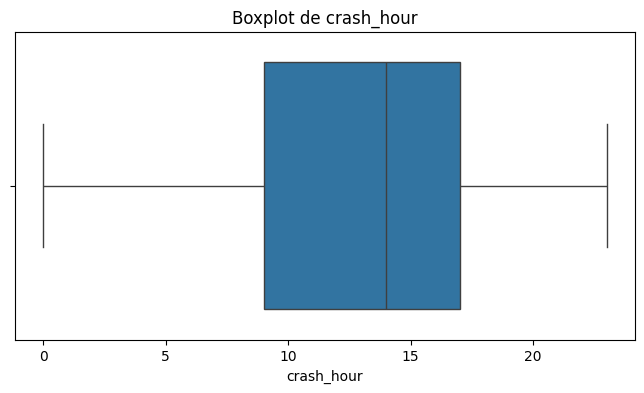

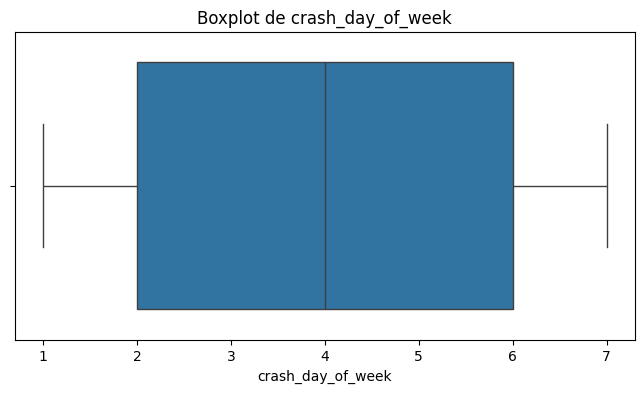

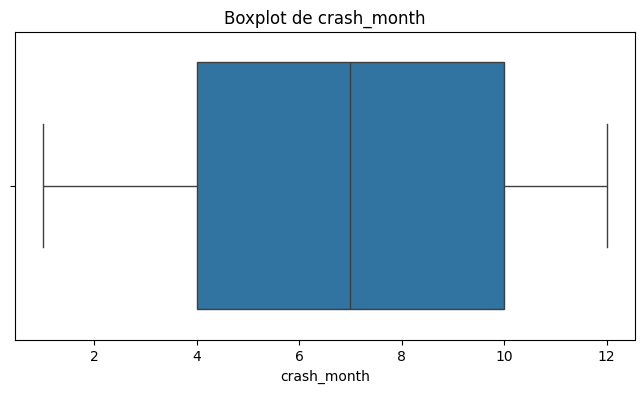

In [64]:
for col in df.select_dtypes(include=["int64", "float64"]).columns.drop("id", errors="ignore"):
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.show()
